<a href="https://colab.research.google.com/github/SenseiJha/DSA-Projects-Collection/blob/main/ANN_Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [5]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Preprocessing

In [7]:
insurance_data["sex"].unique()

array(['female', 'male'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
insurance_data["sex"] = le_encoder.fit_transform(insurance_data["sex"])

In [9]:
le_encoder = LabelEncoder()
insurance_data["smoker"] = le_encoder.fit_transform(insurance_data["smoker"])

In [10]:
le_encoder = LabelEncoder()
insurance_data["region"] = le_encoder.fit_transform(insurance_data["region"])

In [11]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

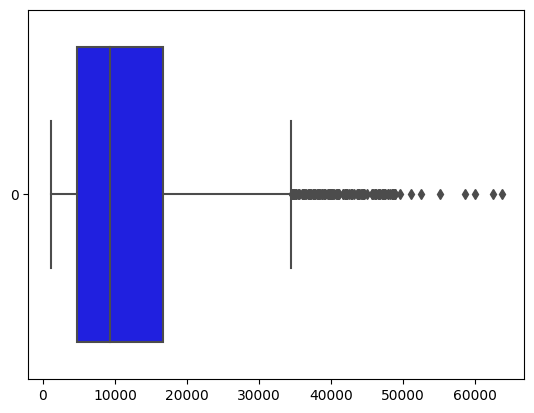

In [21]:
import seaborn as sns
sns.boxplot(insurance_data['charges'], color = "blue", orient = "h")

Handling Outliers

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(insurance_data['charges']))

In [26]:
np.where(z > 3)

(array([  34,  543,  577,  819, 1146, 1230, 1300]),)

In [27]:
insurance_data.drop([  34,  543,  577,  819, 1146, 1230, 1300], inplace = True)

Train & Test Data

In [ ]:
X = insurance_data.drop(['charges'], axis = 1)
Y = insurance_data['charges']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=3)

ANN Regression

In [18]:
def build_model():
  model = Sequential()
  #Input
  model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
  #Hidden - I
  model.add(Dense(units = 256, activation = 'relu'))
  #Hidden - II
  model.add(Dense(units = 512, activation = 'relu'))
  #Output
  model.add(Dense(units = 1))
  model.compile(loss = 'mean_squared_error', optimizer = 'RMSprop', metrics = ['mean_squared_error','mean_absolute_error'])
  return model

In [ ]:
model = build_model()
history = model.fit(x_train,y_train,epochs = 600,batch_size=30,validation_split = 0.2)

In [30]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,302614976.0,302614944.0,12333.978516,162540944.0,162540944.0,7723.785645
1,164040448.0,164040448.0,8499.147461,101235768.0,101235768.0,8075.607422
2,135911776.0,135911776.0,9408.253906,100962760.0,100962760.0,8077.985352
3,135340800.0,135340800.0,9430.123047,100644432.0,100644432.0,8071.602051
4,135033584.0,135033584.0,9353.578125,100987336.0,100987336.0,8223.148438
...,...,...,...,...,...,...
595,20656724.0,20656724.0,2632.005859,25592322.0,25592322.0,2371.441650
596,20034126.0,20034126.0,2607.447510,22597928.0,22597928.0,2982.498535
597,20163254.0,20163254.0,2622.809082,32560830.0,32560830.0,4914.894043
598,20576438.0,20576438.0,2757.960205,22563982.0,22563982.0,2810.059570


<Axes: >

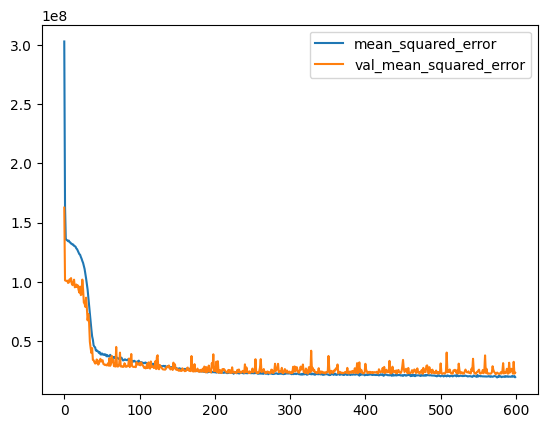

In [31]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [32]:
y_act = model.predict(x_test)

9/9 [==============================] - 0s 3ms/step


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_act)

0.8366857402478868

In [36]:
results = pd.DataFrame(y_act, columns = ['Predicted_Value'])

<Axes: >

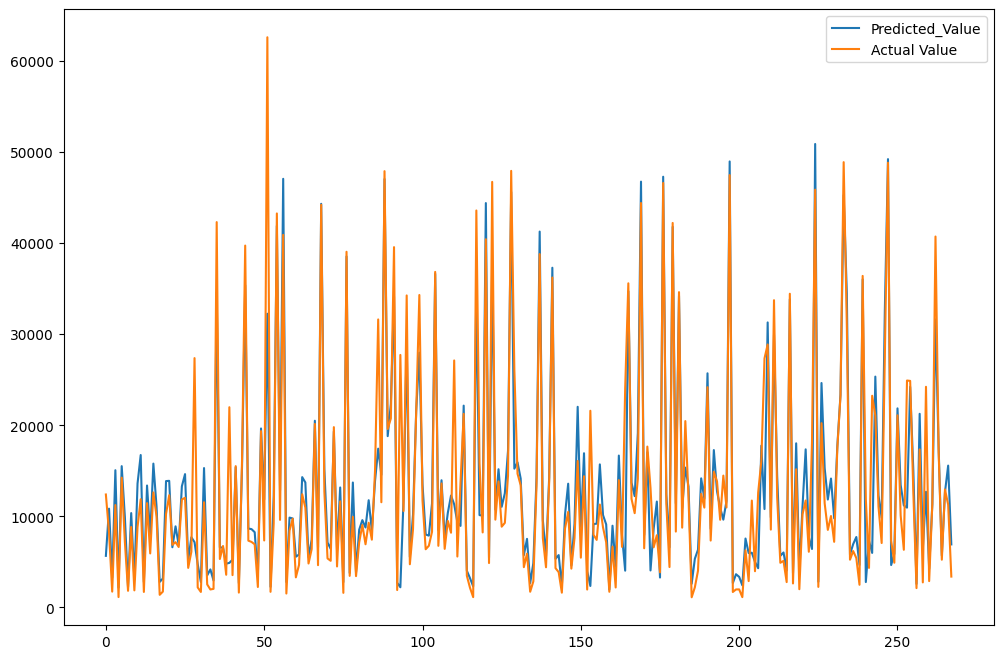

In [38]:
results['Actual Value'] = np.array(y_test)
results.plot(figsize=(12,8))